## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
%matplotlib notebook
from scipy.stats import linregress
from functools import reduce


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#print(study_results)

#mouse_metadata.head()

# Combine the data into a single dataset
mousemerge_df = mouse_metadata.merge(study_results, on='Mouse ID')
mousemerge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
mousemerge_df = mousemerge_df.rename(columns={'Mouse ID': 'Mouse_ID', 'Drug Regimen': 'Regimen'})
mousemerge_df

,Mouse_ID,Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice in the DataFrame.
#study_results.index
mousemerge_df['Mouse_ID'].count()

print(mousemerge_df['Mouse_ID'].nunique())

249


In [4]:
mouse_counts = mousemerge_df['Mouse_ID'].value_counts()
mouse_counts

g989    13
z578    10
i738    10
g296    10
u327    10
        ..
x336     1
b447     1
l872     1
x226     1
f932     1
Name: Mouse_ID, Length: 249, dtype: int64

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#print(mousemerge_df)['Mouse ID'].duplicates[0]
mousemerged_df = mousemerge_df[mousemerge_df.duplicated(['Mouse_ID', 'Timepoint'], keep=False)]
mousemerged_df

,Mouse_ID,Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
mousemerge_df[mousemerge_df.duplicated() ==True].head()
#mousemerge_df.iloc[mousemerge_df[909]].drop(inplace = True)

,Mouse_ID,Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mousemerge_df.drop_duplicates(subset=['Mouse_ID', 'Timepoint'], keep='first')
clean_df

,Mouse_ID,Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice in the clean DataFrame.
print(clean_df['Mouse_ID'].nunique())
print(mousemerged_df['Mouse_ID'].nunique())
clean_df

249
1


,Mouse_ID,Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
#SEM of the tumor volume for each regimen
  #tumor_volume = mousemerge_df(['Drug Regimen']).mean()
mouse_mean_df = clean_df.groupby('Regimen').mean()['Tumor Volume (mm3)']
mouse_median_df = clean_df.groupby('Regimen').median()['Tumor Volume (mm3)']
mouse_var_df = clean_df.groupby('Regimen').var()['Tumor Volume (mm3)']
mouse_std_df = clean_df.groupby('Regimen').std()['Tumor Volume (mm3)']
mouse_sem_df = clean_df.groupby('Regimen').sem()['Tumor Volume (mm3)']
mouse_summary_df = pd.DataFrame({'Mean': mouse_mean_df, 
                                'Median': mouse_median_df,
                                'Variance': mouse_var_df,
                                'Standard Deviation': mouse_std_df,
                                'SEM': mouse_sem_df})
mouse_summary_df

# This method is the most straightforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and 
#SEM of the tumor volume for each regimen
summary_df = clean_df.groupby('Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
summary_df
# This method produces everything in a single groupby function.

Tumor Volume (mm3)                                          
                        mean     median        var       std       sem
Regimen                                                               
Capomulin          40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin           52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol          52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril           55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol           54.331565  52.509285  66.173479  8.134708  0.596466
Placebo            54.033581  52.288934  61.168083  7.821003  0.581331
Propriva           52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane           40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn           54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol          53.236507  51.818479  48.533355  6.966589  0.516398

## Bar Plots

<IPython.core.display.Javascript object>


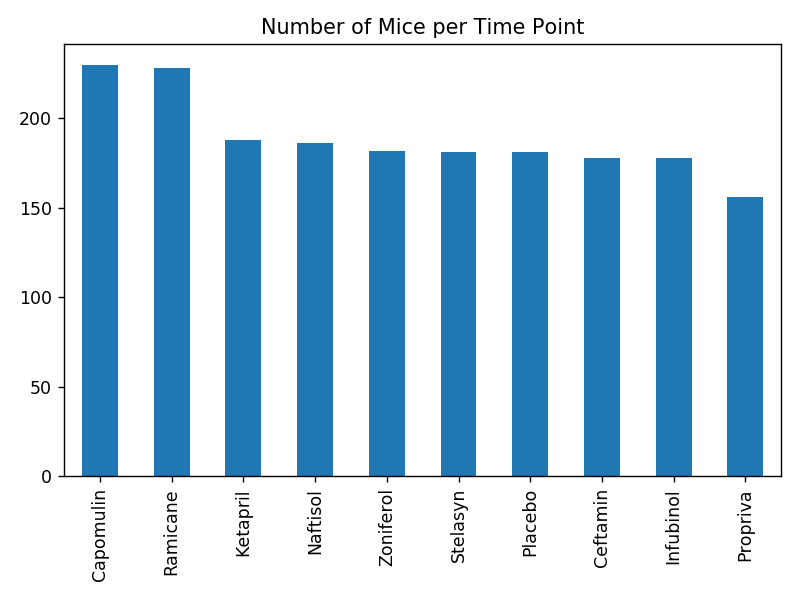

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout 
#the course of the study using pandas.
drug_df = clean_df['Regimen'].value_counts()
drug_df.plot(kind='bar')
#state_and_inches.plot(kind="bar", figsize=(20,3))
plt.title('Number of Mice per Time Point')

plt.show()
plt.tight_layout()




<IPython.core.display.Javascript object>


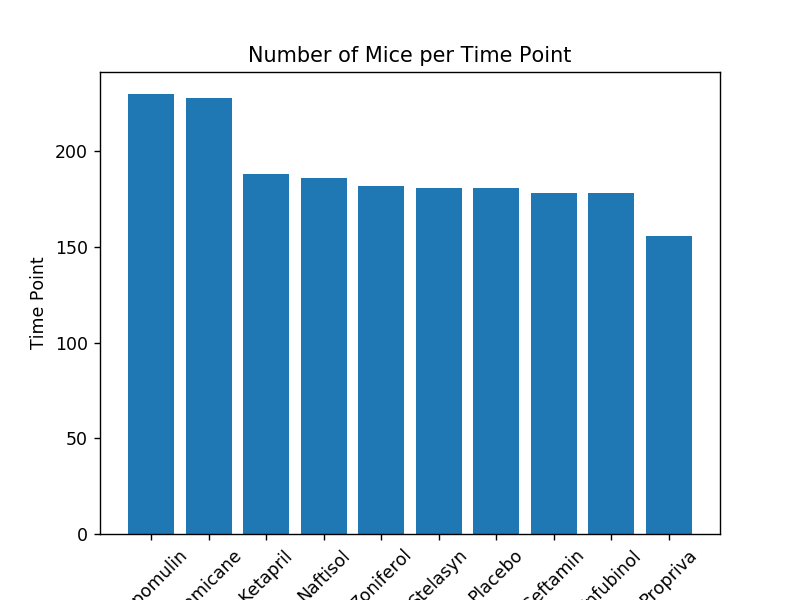

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout 
#the course of the study using pyplot.
x_axis = drug_df.index.values
y_axis = drug_df.values

plt.title('Number of Mice per Time Point')
plt.xlabel('Drug Regimen')
plt.ylabel('Time Point')

tick_locations = [value for value in x_axis]

plt.bar(x_axis, y_axis) 
plt.xticks(rotation=45)
#color='r', alpha=0.5, align="center")

## Pie Plots

In [14]:
clean_df.head()

,Mouse_ID,Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [15]:
P = clean_df.groupby('Mouse_ID')['Sex'].count().reset_index()
P['Percentage'] = 100 * P['Sex']  / P['Sex'].sum()
P

,Mouse_ID,Sex,Percentage
0,a203,10,0.529661
1,a251,10,0.529661
2,a262,10,0.529661
3,a275,10,0.529661
4,a366,7,0.370763
...,...,...,...
244,z435,3,0.158898
245,z578,10,0.529661
246,z581,10,0.529661
247,z795,10,0.529661


In [16]:
sex_p = pd.crosstab(clean_df['Mouse_ID'],clean_df['Sex']).apply(lambda r: r/r.sum(), axis=1)
sex_pd = sex_p.sum()
sex_pd



Sex
Female    124.0
Male      125.0
dtype: float64

<IPython.core.display.Javascript object>


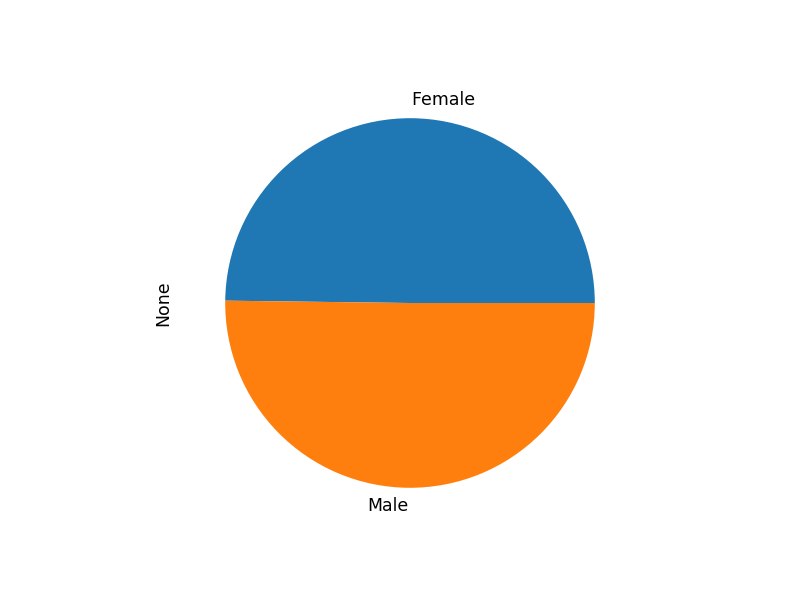

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_pd.plot(kind='pie')
plt.show()

<IPython.core.display.Javascript object>


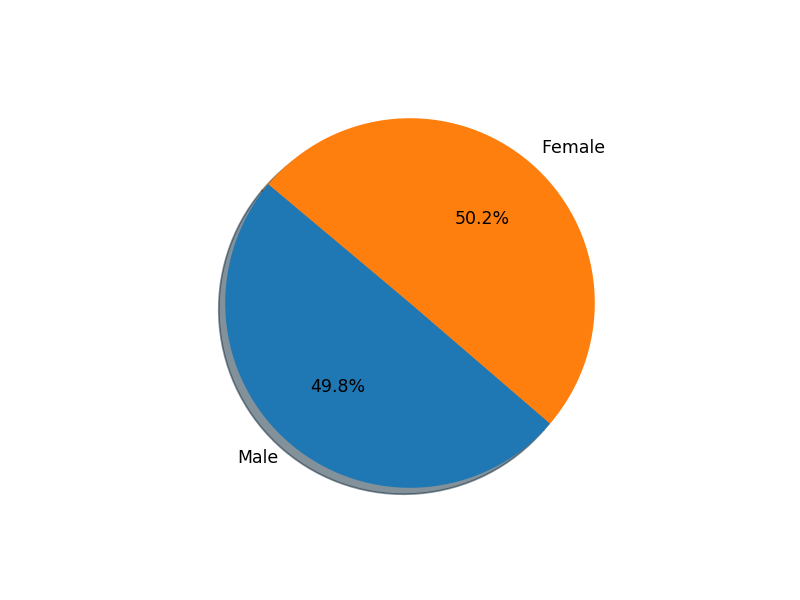

([<matplotlib.patches.Wedge at 0x1e12c7a0c50>,
 [Text(-0.7123680187966352, -0.8381717042442776, 'Male'),
  Text(0.7123680187966355, 0.8381717042442776, 'Female')],
 [Text(-0.3885643738890738, -0.4571845659514241, '49.8%'),
  Text(0.38856437388907383, 0.4571845659514241, '50.2%')])

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ['Male', 'Female']
plt.pie(sex_pd, labels=gender, autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [19]:
clean_df.head(20)

,Mouse_ID,Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

In [20]:
mouse_max_df = clean_df.groupby(['Regimen', 'Timepoint']).max()['Tumor Volume (mm3)']
mouse_max_df

Regimen    Timepoint
Capomulin  0            45.000000
           5            45.895647
           10           46.759074
           15           47.488599
           20           48.158209
                          ...    
Zoniferol  25           60.253481
           30           65.893986
           35           66.742924
           40           71.108118
           45           73.324432
Name: Tumor Volume (mm3), Length: 100, dtype: float64

In [21]:
mmerge_df = clean_df.loc[clean_df['Timepoint'] >= 45]
#mmerge_df.head()

In [22]:
cap_df = mmerge_df[mmerge_df.Regimen == 'Capomulin']
ram_df = mmerge_df[mmerge_df.Regimen == 'Ramicane']
pro_df = mmerge_df[mmerge_df.Regimen == 'Propriva']
ceft_df = mmerge_df[mmerge_df.Regimen == 'Ceftamin']
slcap_df = cap_df.loc[cap_df['Timepoint'] >= 45]
slram_df = ram_df.loc[ram_df['Timepoint'] >= 45]
slpro_df = pro_df.loc[pro_df['Timepoint'] >= 45]
slceft_df = ceft_df.loc[ceft_df['Timepoint'] >= 45]

In [23]:
effective_reg = (mmerge_df.Regimen == 'Capomulin') | (mmerge_df.Regimen == 'Ramicane') | (mmerge_df.Regimen == 'Propriva') | (mmerge_df.Regimen == 'Ceftamin')
eff_df = mmerge_df.loc[effective_reg]

In [24]:
mmerge_df["Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Zoniferol', 'Stelasyn', 'Propriva', 'Naftisol', 'Ketapril'],
      dtype=object)

<IPython.core.display.Javascript object>


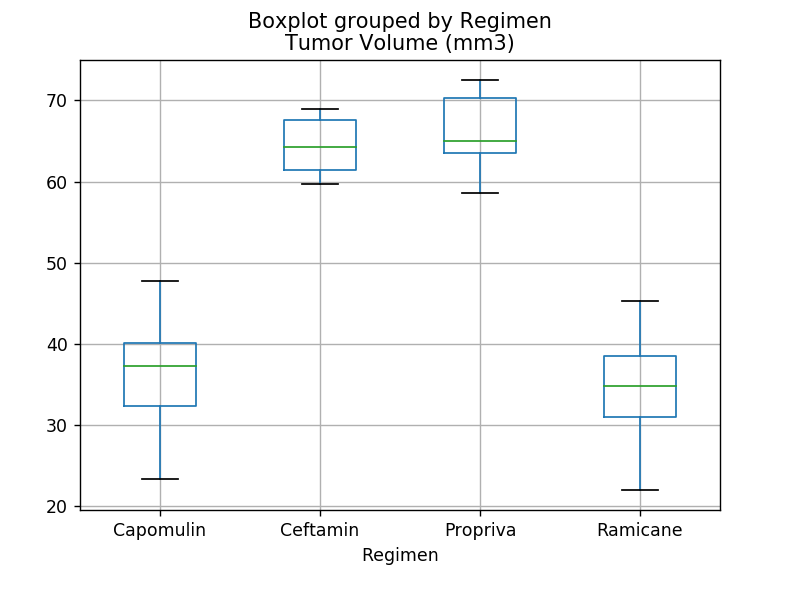

pandas.core.series.Series

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot = eff_df.boxplot(column=['Tumor Volume (mm3)'], by='Regimen',
                     return_type='axes')
type(boxplot)

In [ ]:
#Calculate the IQR and quantitatively determine if there are any potential outliers. 


Line and Scatter Plots

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cappd_df = clean_df[clean_df.Regimen == 'Capomulin']
cappd_df

,Mouse_ID,Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


<IPython.core.display.Javascript object>


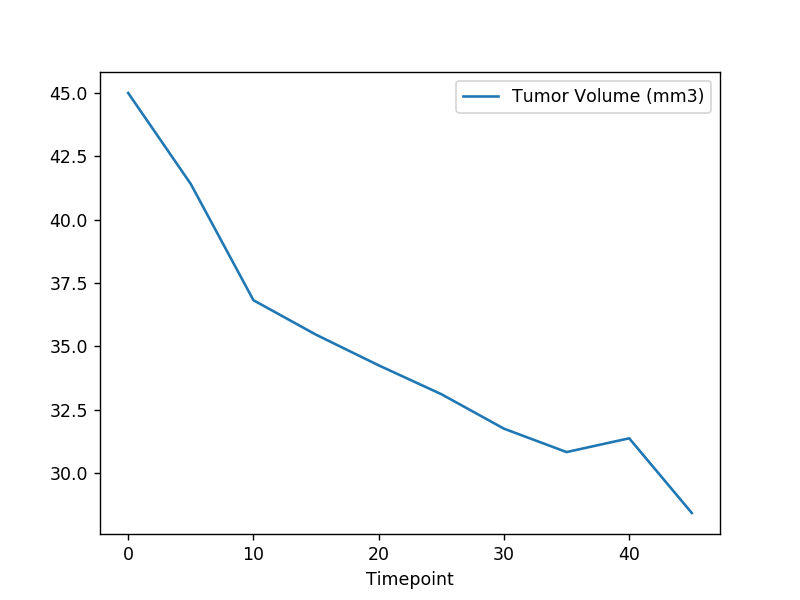

In [27]:
mouse_cap_df = cappd_df.loc[cappd_df["Mouse_ID"] == "m601",:] 
mouse_cap_df.plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)')

In [28]:
cap_mean = cappd_df.groupby(['Timepoint', 'Tumor Volume (mm3)']).mean()
cap_mean = cap_mean.reset_index()
cap_mean

,Timepoint,Tumor Volume (mm3),Age_months,Weight (g),Metastatic Sites
0,0,45.000000,14.04,20.12,0.0
1,5,38.796474,16.00,17.00,0.0
2,5,39.202129,23.00,23.00,0.0
3,5,41.019913,17.00,17.00,0.0
4,5,41.408591,22.00,17.00,1.0
...,...,...,...,...,...
201,45,40.658124,19.00,21.00,2.0
202,45,40.728578,1.00,23.00,1.0
203,45,41.483008,17.00,21.00,3.0
204,45,41.581521,12.00,25.00,2.0


<IPython.core.display.Javascript object>


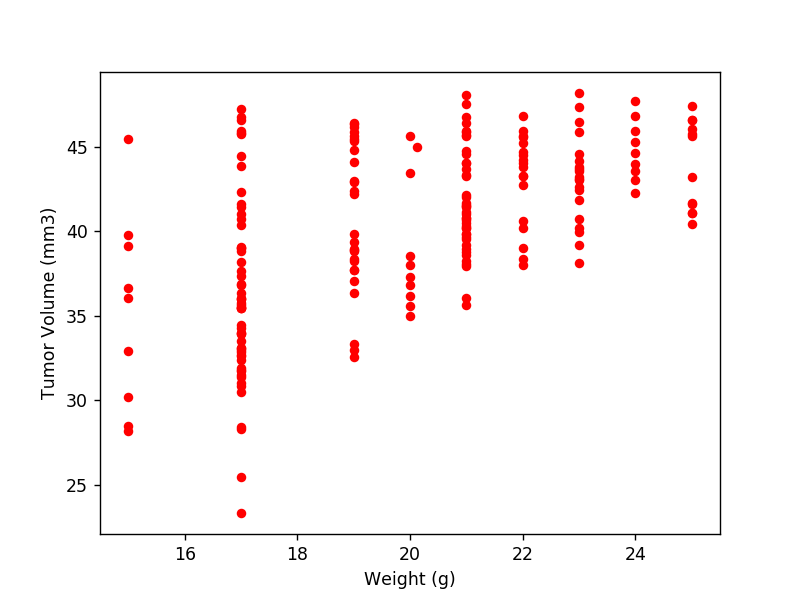

In [32]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

cap_mean.plot(kind='scatter',x='Weight (g)',y='Tumor Volume (mm3)',color='red')
plt.show()

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


<IPython.core.display.Javascript object>


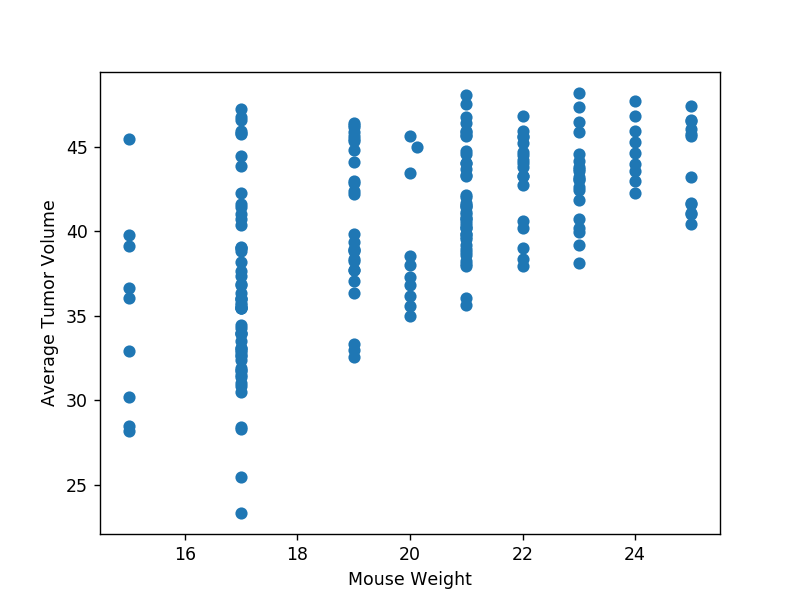

The correlation between both factors is 0.58


In [30]:
weight = cap_mean.iloc[:,3]
tumor = cap_mean.iloc[:,1]
correlation = st.pearsonr(weight,tumor)
plt.scatter(weight,tumor)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

<IPython.core.display.Javascript object>


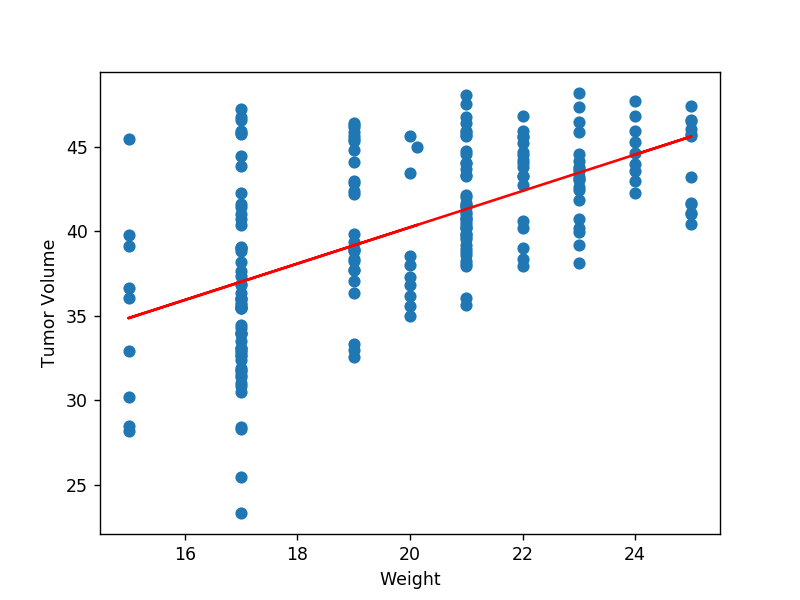

In [31]:
x_values = cap_mean['Weight (g)']
y_values = cap_mean['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.show()